# Description
Данные содержат расходы сырья в т/ч для станции подкачки A (A_rate) и потребителя B (B_rate), а также массовые процентные доли различных компонент на станции A (A_CH4, A_C2H6, A_C3H8, A_iC4H10, A_nC4H10, A_iC5H12, A_nC5H12, A_C6H14).

Целевые переменные: массовые процентные доли нескольких компонент на станции B (B_C2H6, B_C3H8, B_iC4H10, B_nC4H10). Целевые переменные для тестового периода не содержат разрывов, поэтому загружаемое решение должно содержать все временные метки из тестового множества.

## 1. Reading

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
# Train data+targets:
X = pd.read_csv('train_features.csv', parse_dates = ['timestamp'])
y = pd.read_csv('train_targets.csv', parse_dates = ['timestamp'])

# Test data:
X_test = pd.read_csv('test_features.csv', parse_dates = ['timestamp'])

# Example of submission:
example = pd.read_csv('sample_submission.csv', parse_dates = ['timestamp'])

In [3]:
X.head()

timestamp     A_rate  A_CH4  A_C2H6  A_C3H8  A_iC4H10  A_nC4H10  \
0 2020-01-01 00:00:00  70.855017    NaN     NaN     NaN       NaN       NaN   
1 2020-01-01 00:30:00  70.826582    NaN     NaN     NaN       NaN       NaN   
2 2020-01-01 01:00:00  70.809637    NaN     NaN     NaN       NaN       NaN   
3 2020-01-01 01:30:00  69.994748    NaN     NaN     NaN       NaN       NaN   
4 2020-01-01 02:00:00  70.072762    NaN     NaN     NaN       NaN       NaN   

   A_iC5H12  A_nC5H12  A_C6H14     B_rate  
0       NaN       NaN      NaN  71.982789  
1       NaN       NaN      NaN  71.965098  
2       NaN       NaN      NaN  71.867409  
3       NaN       NaN      NaN  71.839126  
4       NaN       NaN      NaN  71.336921

In [4]:
y.head()

timestamp    B_C2H6     B_C3H8   B_iC4H10   B_nC4H10
0 2020-01-01 00:00:00  4.561979  39.015486  17.250740  24.301793
1 2020-01-01 00:30:00  4.550741  39.048915  17.229506  24.257461
2 2020-01-01 01:00:00  4.506793  38.766378  17.171621  24.236298
3 2020-01-01 01:30:00  4.584963  39.069360  17.218521  24.149843
4 2020-01-01 02:00:00  4.607483  38.817579  17.108668  24.049510

In [5]:
example.head()

timestamp    B_C2H6     B_C3H8   B_iC4H10   B_nC4H10
0 2020-05-01 00:00:00  4.363701  37.742757  16.843028  24.171264
1 2020-05-01 00:30:00  4.363701  37.742757  16.843028  24.171264
2 2020-05-01 01:00:00  4.363701  37.742757  16.843028  24.171264
3 2020-05-01 01:30:00  4.363701  37.742757  16.843028  24.171264
4 2020-05-01 02:00:00  4.363701  37.742757  16.843028  24.171264

## 2. Simple EDA

In [164]:
# Списки признаков без timestamp:
data_feats, target_feats = X.columns[1:], y.columns[1:]

In [7]:
# Функция возвращает признаки, содержащие пропуски:
def get_nans(data):
    nan_cols = []
    
    for col in data.columns:
        count = round(100*np.mean(data[col].isnull()), 2)
        
        if count != 0:
            print('{} : {}%'.format(col, count))
            nan_cols.append(col)
            
    return nan_cols

In [8]:
print('Missed values in X_train:\n')
nans_train = get_nans(X[data_feats])

print('\nMissed values in y_train:\n')
nans_target = get_nans(y[target_feats])

print('\nMissed values in X_test:\n')
nans_test = get_nans(X_test[data_feats])

Missed values in X_train:

A_rate : 0.02%
A_CH4 : 16.51%
A_C2H6 : 16.51%
A_C3H8 : 16.51%
A_iC4H10 : 16.51%
A_nC4H10 : 16.51%
A_iC5H12 : 16.51%
A_nC5H12 : 16.51%
A_C6H14 : 16.51%
B_rate : 2.29%

Missed values in y_train:

B_C2H6 : 3.17%
B_C3H8 : 3.1%
B_iC4H10 : 3.1%
B_nC4H10 : 3.1%

Missed values in X_test:

A_rate : 28.66%
A_CH4 : 11.45%
A_C2H6 : 11.32%
A_C3H8 : 11.35%
A_iC4H10 : 11.35%
A_nC4H10 : 11.35%
A_iC5H12 : 11.45%
A_nC5H12 : 11.45%
A_C6H14 : 11.42%
B_rate : 0.13%


In [9]:
# Функция визуализации данных:
def plot_data(data):

    # Correlation heatmap:
    plt.figure(figsize=(16, 8))
    heatmap = sns.heatmap(data.corr()[[data.columns[0]]].sort_values(by=data.columns[0], ascending=False),
                          vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlations in data', fontdict={'fontsize':15}, pad=12)
    
    # Plotting data:
    fig, axes = plt.subplots(len(data.columns), 1, figsize=(16, 5*data.shape[1]))

    for i, col in enumerate(data.columns):
        axes[i].plot(data[col])
        axes[i].set_xlabel(col)
    
    plt.show()

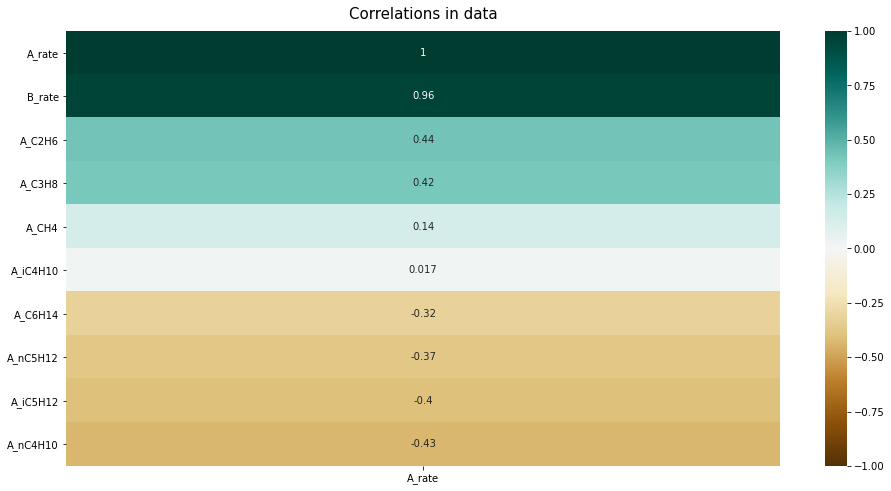

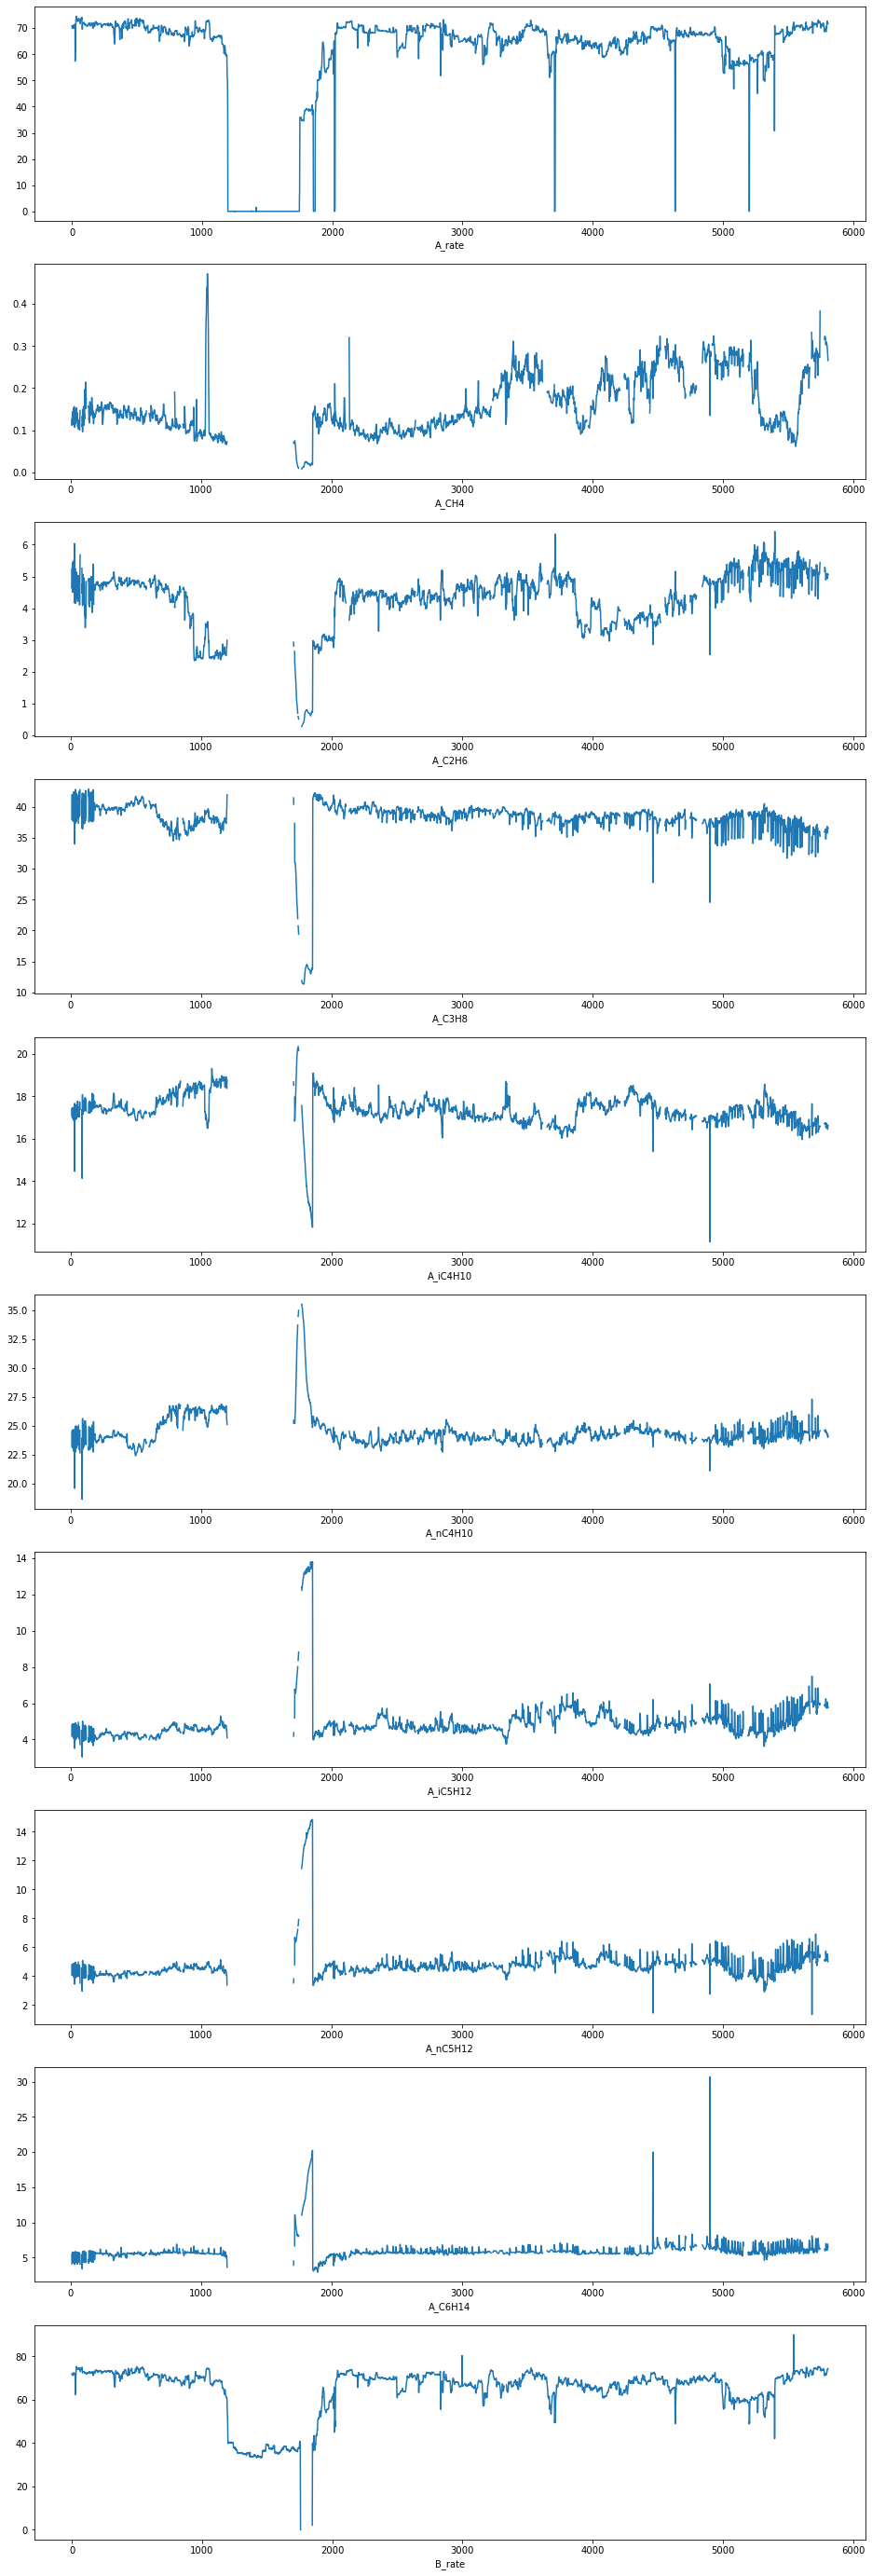

In [10]:
plot_data(X[data_feats])

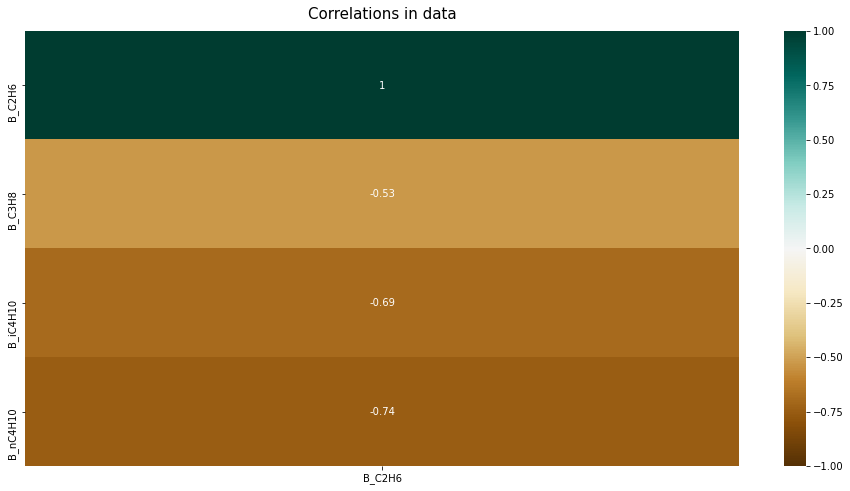

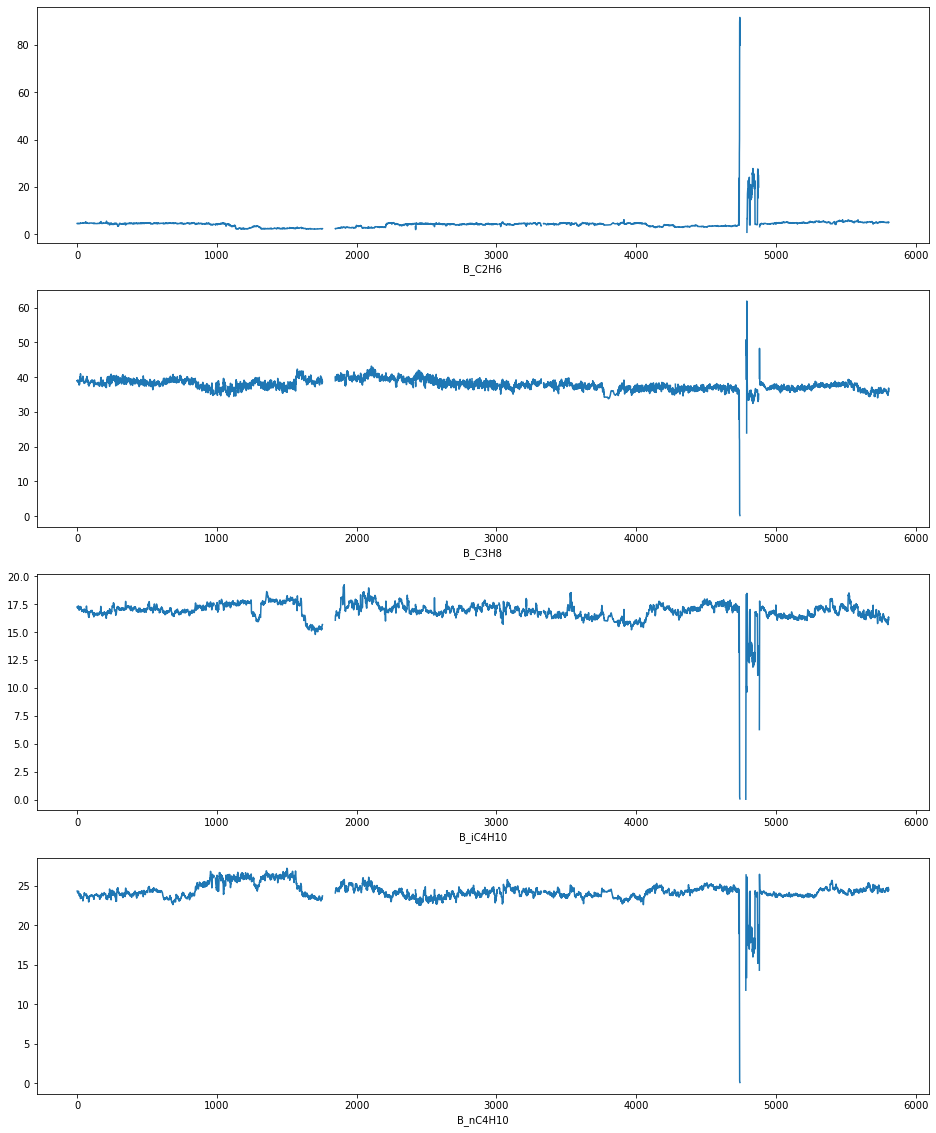

In [11]:
plot_data(y[target_feats])

Посмотрим на локальный участок любого из признаков, который содержится в target-выборке (например, концентрация этана):

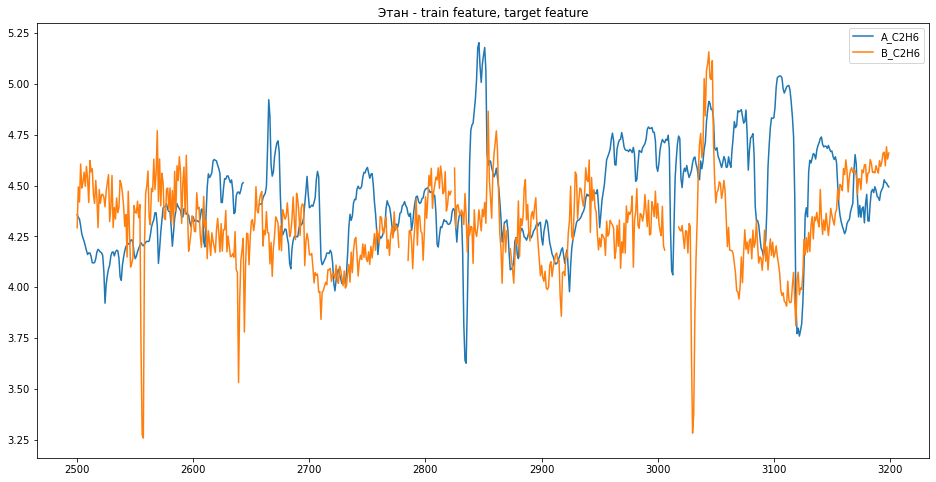

In [12]:
plt.figure(figsize=(16, 8))
plt.title('Этан - train feature, target feature')
X.A_C2H6.iloc[2500:3200].plot(legend=True)
y.B_C2H6.iloc[2500:3200].plot(legend=True)
plt.show()

На графике заметен временной сдвиг показаний хроматографов. Анимация коррекции сдвига:

In [13]:
# Визуализация сдвига:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=X.timestamp.iloc[2800:3200], y=X.A_C2H6.iloc[2800:3200],
                     line=dict(width=2, color="blue"), name='A_C2H6'),
          go.Scatter(x=y.timestamp.iloc[2800:3200], y=y.B_C2H6.iloc[2800:3200],
                     line=dict(width=2, color="orange"), name='B_C2H6')],
    layout=go.Layout(
        xaxis=dict(autorange=True),
        yaxis=dict(autorange=True),
        title="Исходный сдвиг",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=X.timestamp.iloc[2800:3200], y=X.A_C2H6.iloc[2800:3200].shift(k))],
                     layout=go.Layout(title_text="Shifting...")) for k in range(0, 200, 15)])

fig.update_layout(legend_title_text='Компонент')

fig.show()

Попробуем оценить влияние коррекции сдвига на ошибку:

In [14]:
# Функция создаёт датафрейм со сдвигами и соответствующими им MAE по таргетам:
def get_shift_df(low, high):
    shift_range = np.arange(low, high, 1)
    df = pd.DataFrame({'Shift_value': shift_range})
    
    for col_y, col_x in zip(y.columns[1:], X.columns[3:7]):
        df['MAE_{}'.format(col_y)] = [(y[col_y] - X[col_x].shift(x)).abs().mean() for x in shift_range]
    
    return df

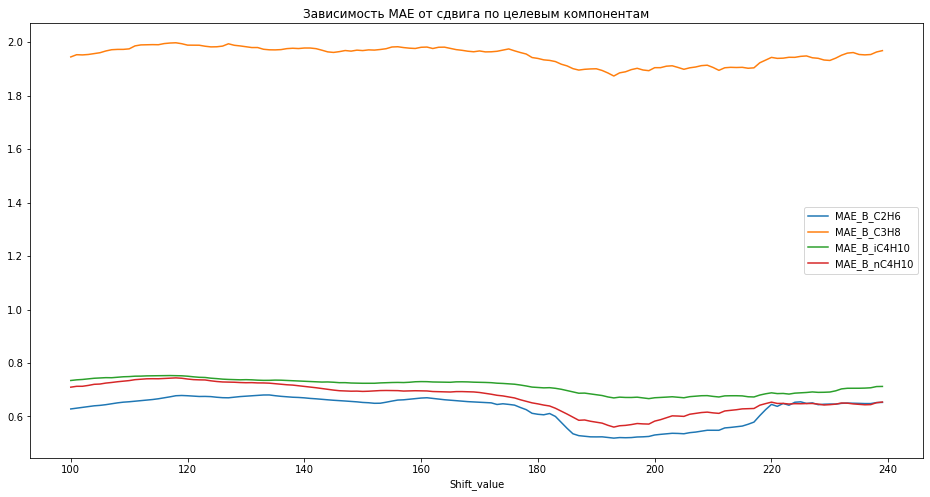

In [15]:
shifts = get_shift_df(100, 240)

shifts.plot('Shift_value', shifts.columns[1:],
            figsize=(16, 8),
            title='Зависимость MAE от сдвига по целевым компонентам')
plt.show()

На графике заметны области с низкой MAE.
- Для всех компонентов оптимальный сдвиг находится в районе 190

In [16]:
# Получим значения константных сдвигов, оптимальные для каждого целевого компонента:
shift_values = []

for col in shifts.columns[1:]:
    shift_values.append(shifts.Shift_value[shifts[col].argmin()])
    
shift_values

[193, 193, 199, 193]

### что в X_train:
- В признаках A_rate, B_rate есть провал (конец января - февраль), который можно интерпретировать как стоячую смесь/низкий расход. Причём внутри провала присутствуют два горба:
- - первый горб A_rate, предположительно, говорит о начале подкачки - здесь расход всё ещё ниже среднего, хроматограф даёт сильные аномалии по концентрациям
- - второй горб A_rate - расход приближается к среднему, хроматограф практически приходит в норму (исключение - этан, но это не точно)

### что в target:
- В целевых признаках присутствуют аномальные выбросы в конце выборки - они практически никак не отражены в обучающих данных, следовательно, имеет смысл агрессивно сгладить аномальный участок

Данные наблюдения следует учесть при заполнении пропусков в тестовой выборке для A_rate, B_rate (взять среднее по 1, 3 и 4 месяцам из обучающих данных). Остальные признаки в тесте можно заполнять, используя среднее по всей обучающей выборке.

### для X_train/target:
- Пропуски в начале выборки заполнять средним по выборке за предыдущую/текущую неделю, далее: средним по k-предыдущим и k-следующим.

### для X_test:
- Пропуски в начале выборки заполнять средним из обучающей выборки, учитывая наблюдения выше. Далее - использовать среднее по k-предыдущим.

Сглаживание данных и работа с выбросами будет реализована ниже.

## 3.1 NaN filling: Train data

In [17]:
def get_holes(data_x, data_y):
    data_new_x = data_x.copy()
    data_new_y = data_y.copy()
    
    # X_train:
    # Удаляю всплеск концентраций в диапазоне первого горба (первая подкачка после простоя):
    for col in data_new_x.columns[2:10]:
        data_new_x.loc[1710:1872, [col]] = np.nan
        
    # target:
    # Удаляю всплеск концентраций в конце выборки:
    for col in data_new_y.columns[1:]:
        data_new_y.loc[4733:4884, [col]] = np.nan
        
    return data_new_x, data_new_y

In [18]:
%%time
# Обновление данных - удаление аномальных диапазонов:
X_hole, y_hole = get_holes(X, y)

Wall time: 15.5 ms


In [19]:
def fill_nan_train(data, k):
    data_new = data.copy()
    
    # Заполняю пропуски:
    for col in data_new.columns[1:]:
        for idx in data_new[col][data_new[col].isnull()==True].index:
            
            if idx in range(0, k):
                # Среднее за последнюю неделю:
                data_new.loc[idx, [col]] = data_new[col][data_new.timestamp.dt.isocalendar().week
                                                         ==
                                                         data_new.timestamp.dt.isocalendar().week[idx]].mean()
            else:
                # Среднее между k-предыдущими и k-следующими отсчётами:
                data_new.loc[idx, [col]] = data_new.loc[idx-k:idx+k, [col]].mean()

    return data_new

In [20]:
%%time
# Обновление данных - заполнение пропусков:
X_filled = fill_nan_train(X_hole, 12)
y_filled = fill_nan_train(y_hole, 12)

Wall time: 17.3 s


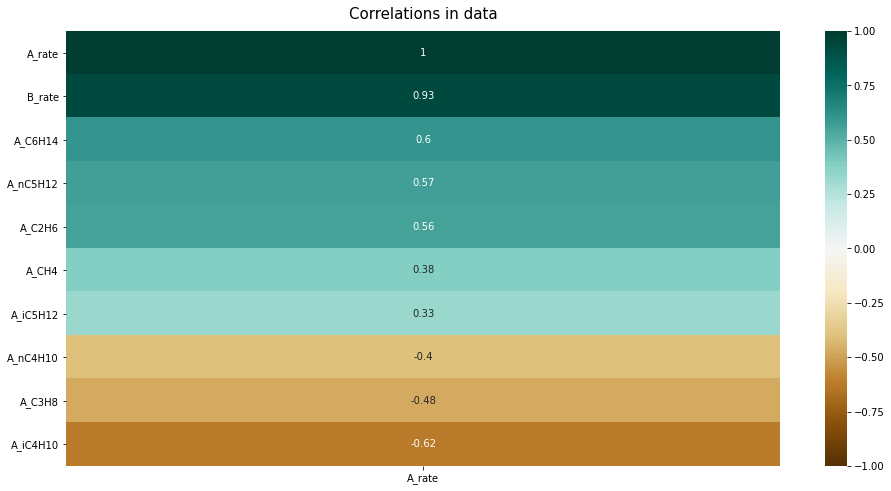

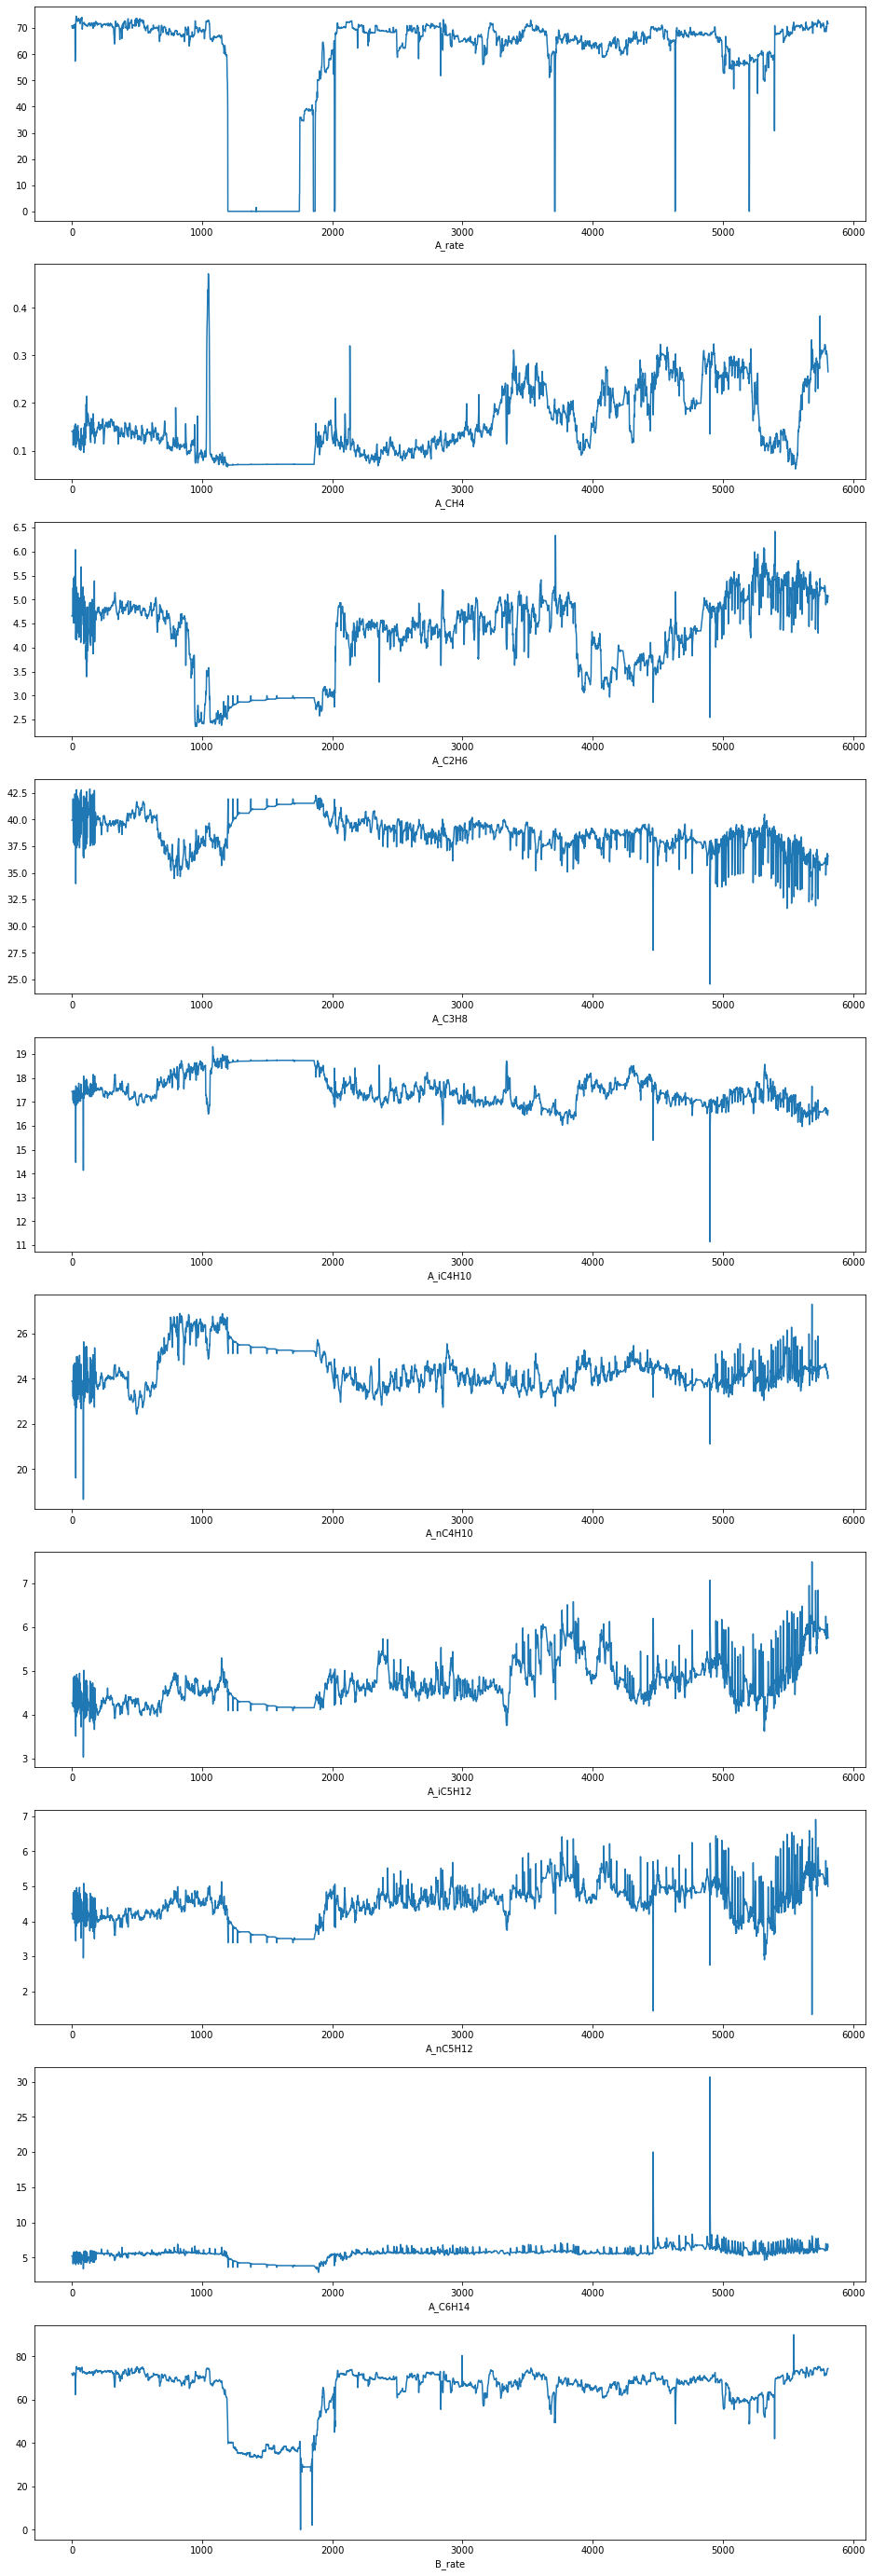

In [21]:
plot_data(X_filled[data_feats])

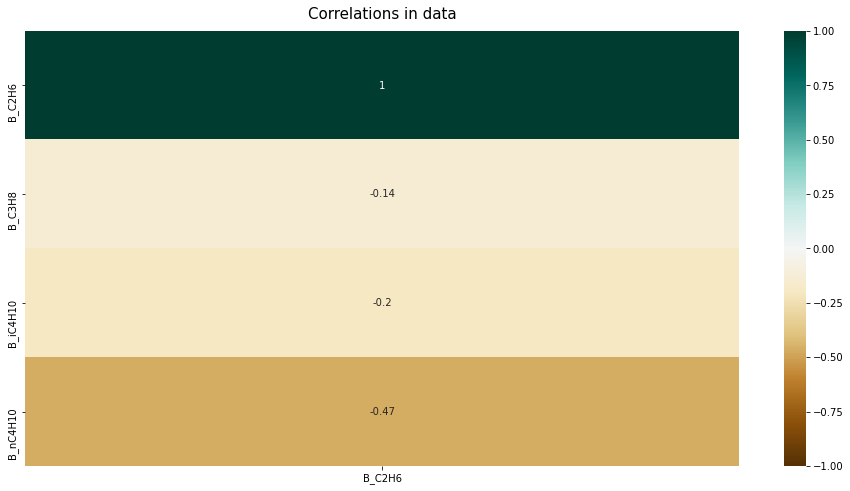

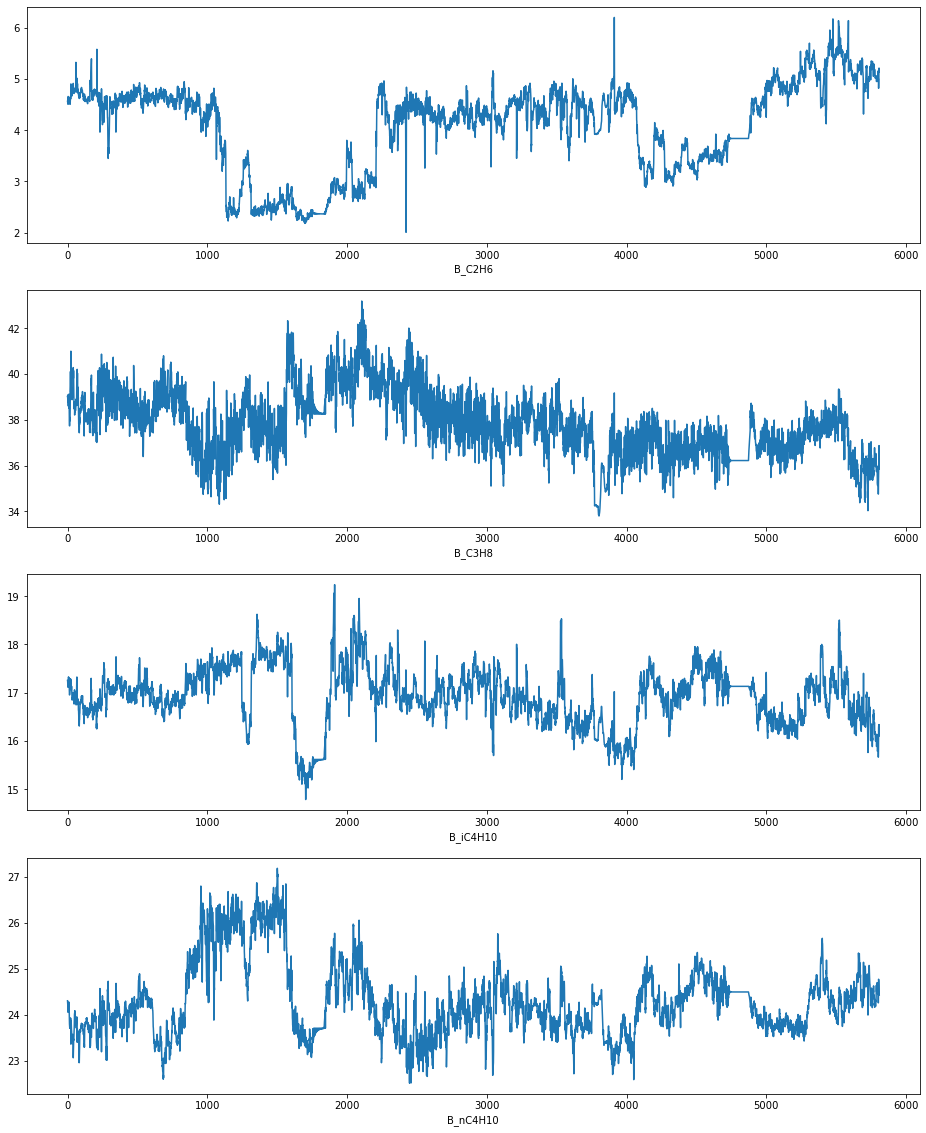

In [22]:
plot_data(y_filled[target_feats])

## 3.2 NaN filling: Test data

In [23]:
# Функция заполняет пропуски в тестовой выборке:
# - Если какое-то из первых k значений в датасете - NaN, то оно заменяется средним из ОБУЧАЮЩЕЙ выборки;
# - Далее NaN заменяется средним по k прошлых значений.

def fill_nan_test(data, k):
    data_new = data.copy()
    
    # A_rate, B_rate:
    for col in data_new.columns[1::9]:
        for idx in data_new[col][data_new[col].isnull()==True].index:
            
            if idx in np.arange(0, k):
                data_new.loc[idx, [col]] = X_filled[col][X_filled.timestamp.dt.month][[1, 3, 4]].mean()
            else:
                data_new.loc[idx, [col]] = data_new.loc[idx-k:idx, [col]].mean()[0]
                
    # Components:
    for col in data_new.columns[2:10]:
        for idx in data_new[col][data_new[col].isnull()==True].index:

            if idx in np.arange(0, k):
                data_new.loc[idx, [col]] = X_filled[col].mean()
            else:
                data_new.loc[idx, [col]] = data_new.loc[idx-k:idx, [col]].mean()[0]
                
    return data_new

In [24]:
%%time
# Обновление данных - заполнение пропусков:
X_test_filled = fill_nan_test(X_test, 48)

Wall time: 7.48 s


## 4.1 Outliers: Train data

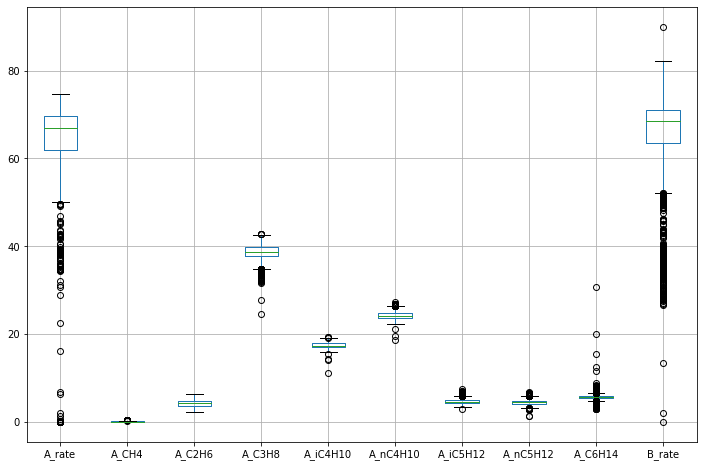

In [25]:
# Посмотрим на выбросы в обучающей выборке X:
X_filled[data_feats].boxplot(figsize=(12, 8))
plt.show()

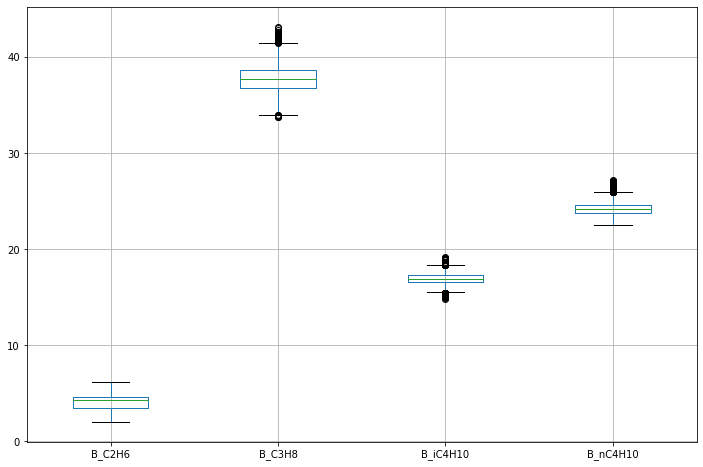

In [26]:
# Посмотрим на выбросы в обучающей выборке y:
y_filled[target_feats].boxplot(figsize=(12, 8))
plt.show()

### для X_train/X_test:
- В случае использования для обучения участка выборки с шумной областью (янв-фев), имеет смысл сгенерировать признак по A_rate, B_rate > n - что, предположительно, говорит о режиме подачи (1 - рабочий режим, 0 - низкий расход/стоячая смесь)

### для X_train/X_test/target:
- Сглаживать всё что примерно ниже low и выше high персентилей по среднему k-предыдущих
- Попробовать экспоненциальное сглаживание

In [27]:
# Функция экспоненциального сглаживания данных по текущему и прошлому значениям:
def smooth(data, alpha):
    data_new = data.copy()
    
    for col in data_new.columns[1:]:
        for idx in data_new[col].index[1:]:
            # Exp. smoothing:
            data_new.loc[idx, [col]] = alpha*(data_new.loc[idx, [col]]) + (1-alpha)*data_new.loc[idx-1, [col]]
    
    return data_new

In [28]:
# Функция работает с выбросами в Train (сглаживание значений ниже low и выше high персентилей по среднему k-предыдущих):
def fill_out_train(data, k, low, high):
    data_new = data.copy()
    
    for col in data_new.columns[1:]:
        
        for idx in data_new[col][data_new[col] <= np.percentile(data_new[col], low)].index:
            data_new.loc[idx, [col]] = data_new.loc[idx-k:idx-1, [col]].mean()[0]
        
        for idx in data_new[col][data_new[col] >= np.percentile(data_new[col], high)].index:
            data_new.loc[idx, [col]] = data_new.loc[idx-k:idx-1, [col]].mean()[0]
    
    return data_new

In [29]:
%%time
# Обновление данных:
X_filled_out = smooth(fill_out_train(X_filled, 10, 4, 96), 0.05)
y_filled_out = smooth(fill_out_train(y_filled, 10, 4, 96), 0.05)

Wall time: 4min 5s


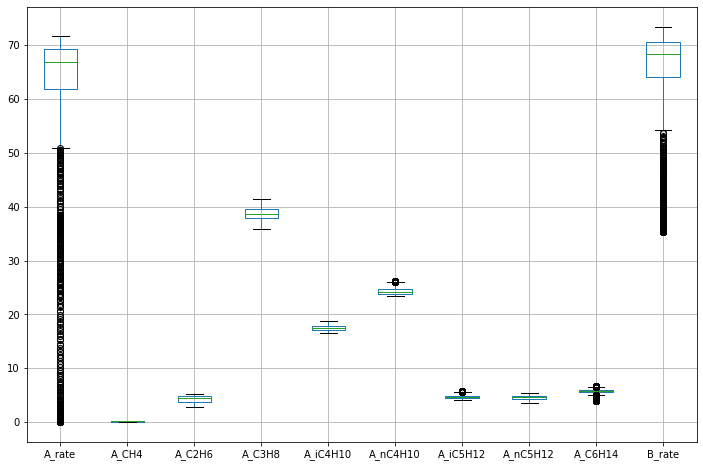

In [30]:
# Посмотрим на выбросы в обучающей выборке X:
X_filled_out[data_feats].boxplot(figsize=(12, 8))
plt.show()

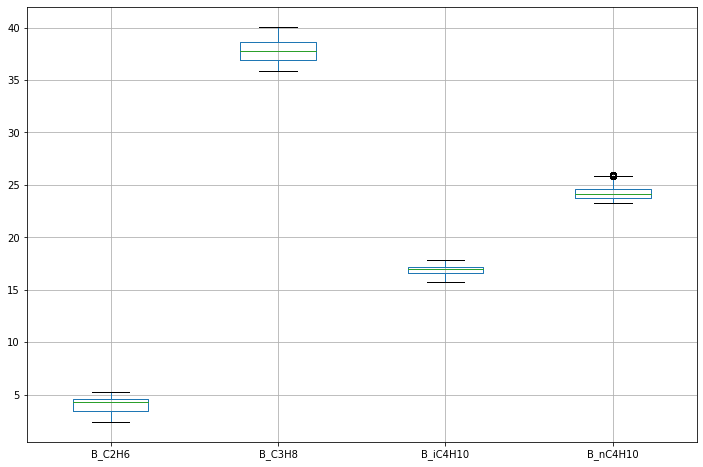

In [31]:
# Посмотрим на выбросы в обучающей выборке y:
y_filled_out[target_feats].boxplot(figsize=(12, 8))
plt.show()

## 4.2 Outliers: Test data

In [32]:
# Функция работает с выбросами в Test (сглаживающее окно по среднему k-предыдущих):
def fill_out_test(data, k, low, high):
    data_new = data.copy()
    
    for col in data_new.columns[1:]:
        for idx in data_new[col].index[k:]:
            
            if data_new.loc[idx, [col]][0] < np.percentile(data_new.loc[0:idx-1, [col]], low):
                data_new.loc[idx, [col]] = data_new.loc[idx-k:idx, [col]].mean()[0]
            if data_new.loc[idx, [col]][0] > np.percentile(data_new.loc[0:idx-1, [col]], high):
                data_new.loc[idx, [col]] = data_new.loc[idx-k:idx, [col]].mean()[0]
    
    return data_new

In [33]:
%%time
# Обновление данных:
X_test_filled_out = smooth(fill_out_test(X_test_filled, 6, 4, 96), 0.05)

Wall time: 4min 29s


## 5. Shifting

In [161]:
# Функция осуществляет временной сдвиг для признаков:
def get_shifted_features(data, shifts):
    data_new = data.copy()
    avg = round(np.mean(shift_values))
    
    data_new[data_new.columns[2]] = data_new[data_new.columns[2]].shift(avg)
    data_new[data_new.columns[7:-1]] = data_new[data_new.columns[7:-1]].shift(avg)
    
    data_new[data_new.columns[3]] = data_new[data_new.columns[3]].shift(shifts[0])
    data_new[data_new.columns[4]] = data_new[data_new.columns[4]].shift(shifts[1])
    data_new[data_new.columns[5]] = data_new[data_new.columns[5]].shift(shifts[2])
    data_new[data_new.columns[6]] = data_new[data_new.columns[6]].shift(shifts[3])
    
    return data_new

In [162]:
%%time
# Обновление данных:
X_shifted = fill_nan_train(get_shifted_features(X_filled_out, shift_values), 6)
X_test_shifted = fill_nan_test(get_shifted_features(X_test_filled_out, shift_values), 6)

Wall time: 5.6 s


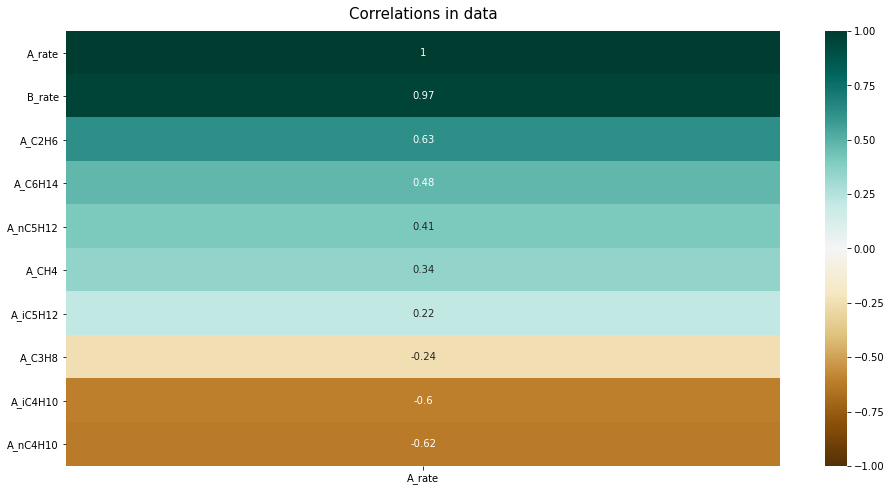

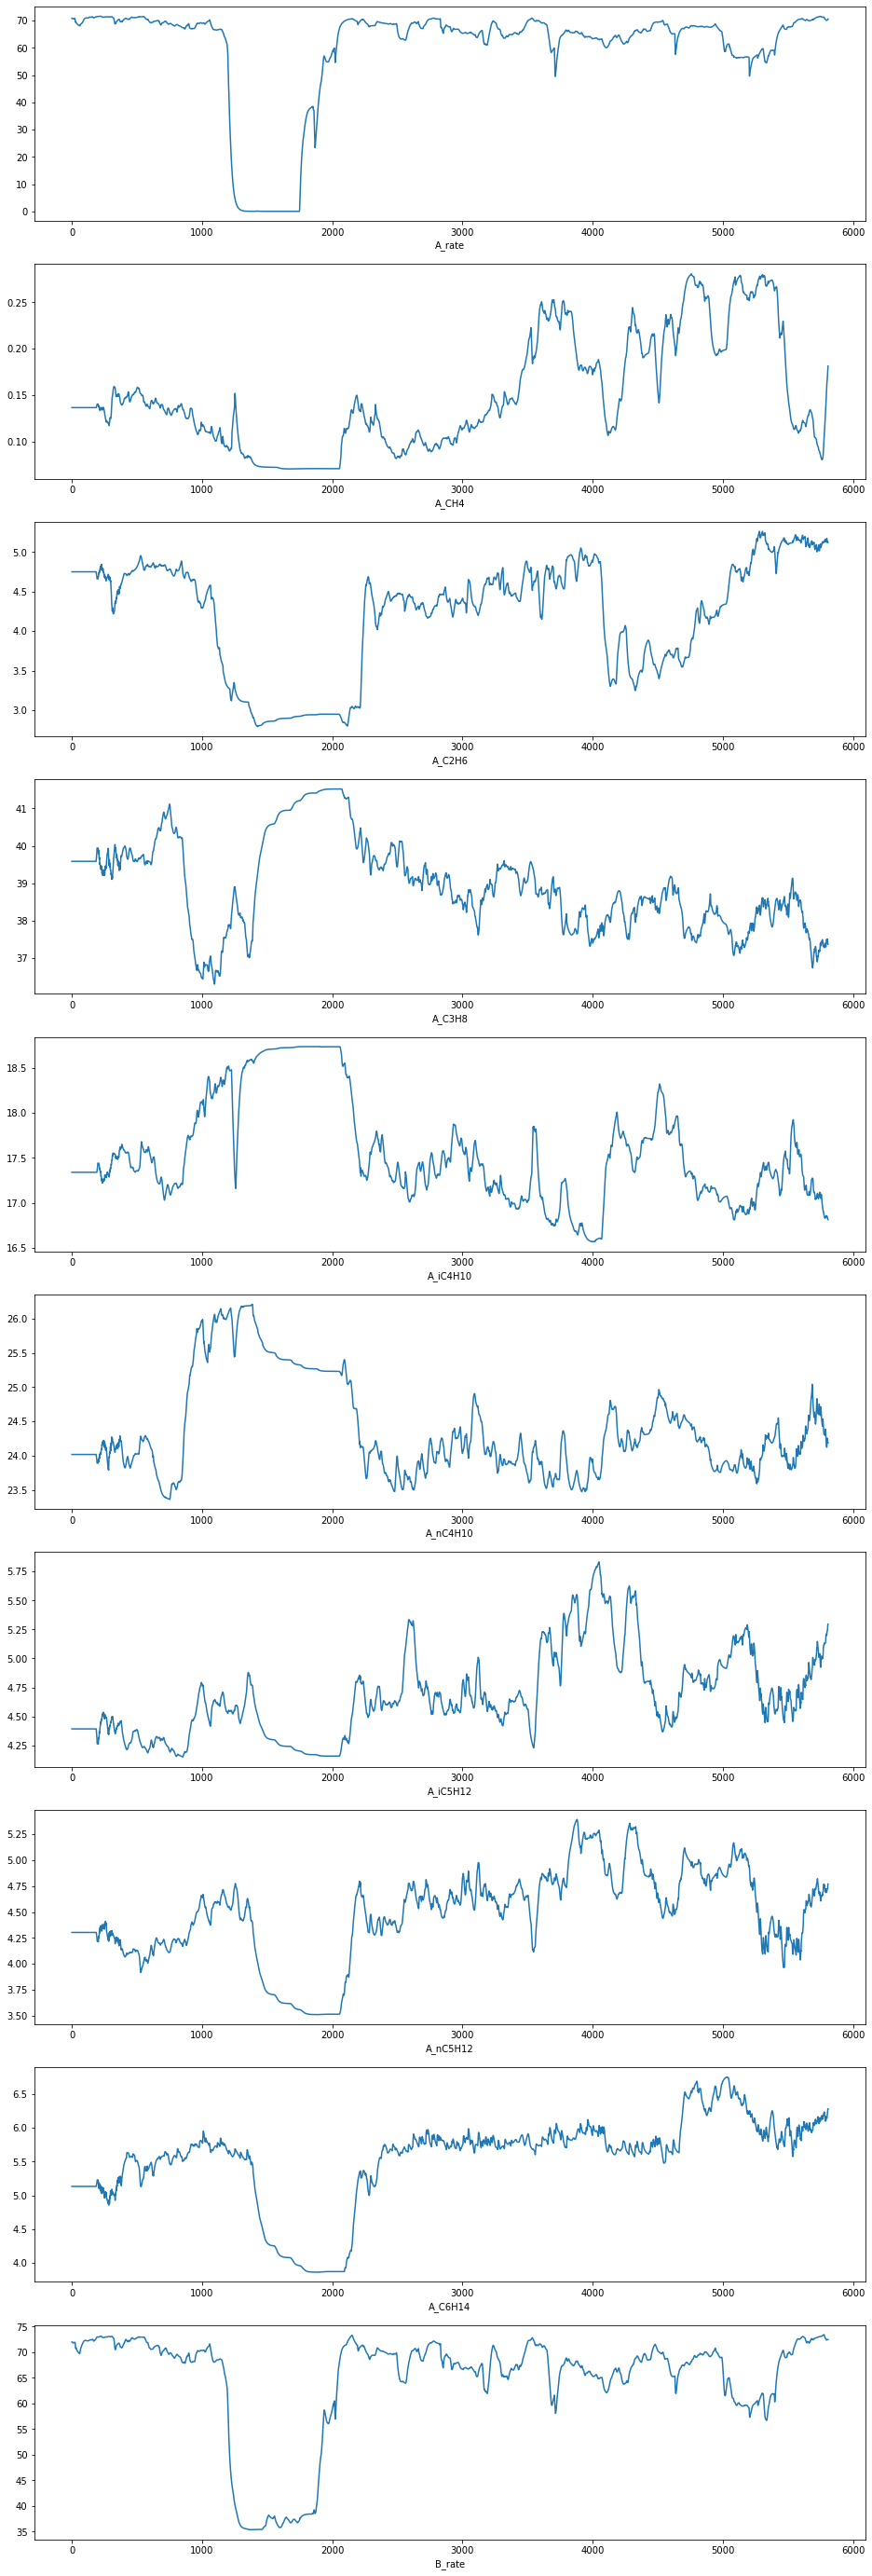

In [165]:
plot_data(X_shifted[data_feats])

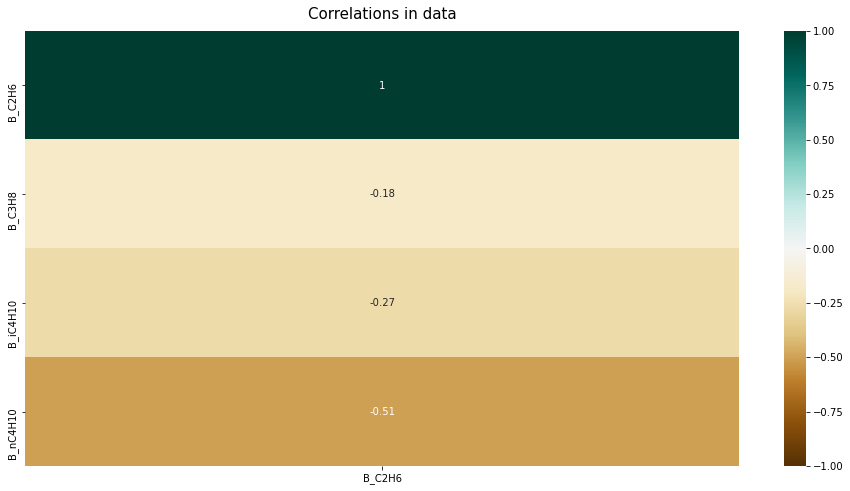

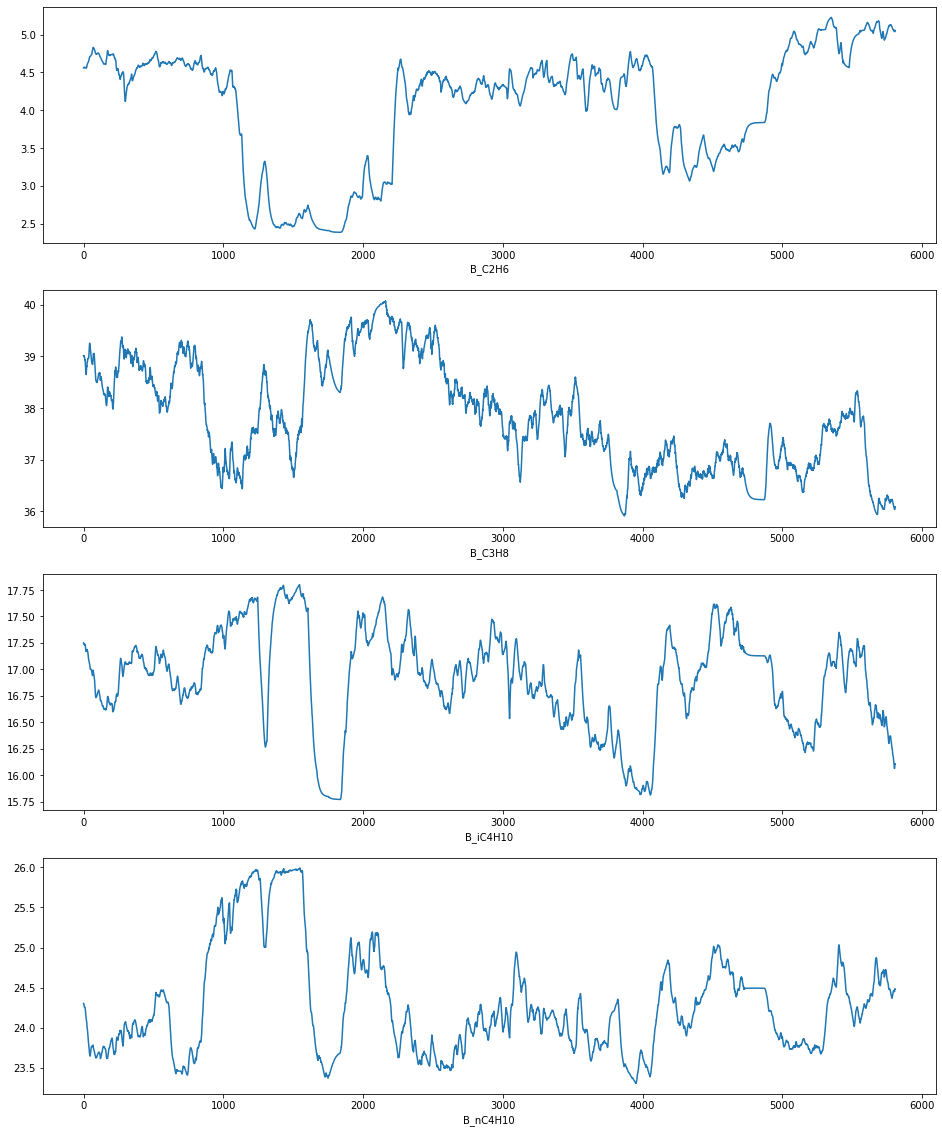

In [37]:
plot_data(y_filled_out[target_feats])

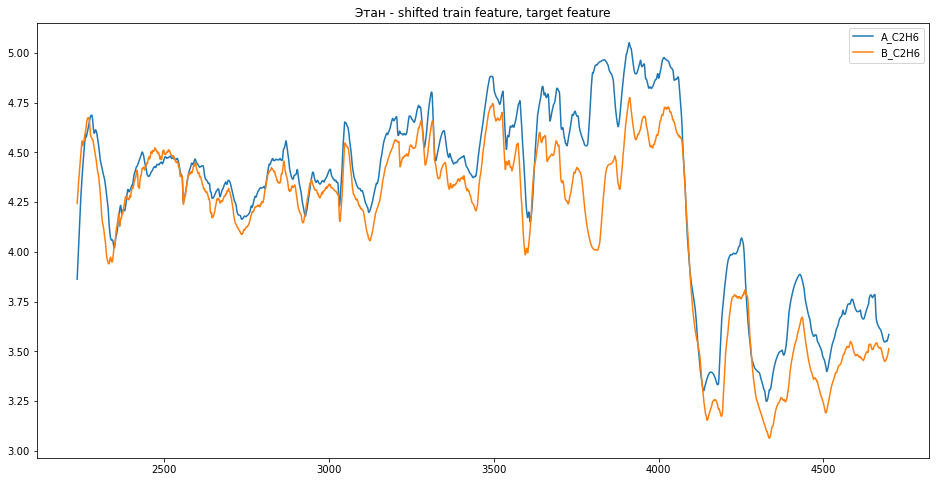

In [125]:
# Посмотрим на сдвинутый и предобработанный этан:
plt.figure(figsize=(16, 8))
plt.title('Этан - shifted train feature, target feature')
X_shifted.A_C2H6.iloc[2235:4700].plot(legend=True)
y_filled_out.B_C2H6.iloc[2235:4700].plot(legend=True)
plt.show()

## 6. New features, timestamp decomposition

In [39]:
# Функция добавляет разность расхода смеси между двумя точками замера, а также метку режима течения:
def get_AB_feats(data, n):
    data_new = data.copy()
    data_new['AB_diff'] = data_new['B_rate'] - data_new['A_rate']
    data_new['A_low_flow'] = data_new['A_rate'].apply(lambda x: 1 if x > n else 0)
    data_new['B_low_flow'] = data_new['B_rate'].apply(lambda x: 1 if x > n else 0)
    return data_new

In [40]:
# Функция сепарирует timestamp:
def get_times(data):
    data['DT_dayofweek'] = data['timestamp'].dt.dayofweek
    data['DT_daysinmonth'] = data['timestamp'].dt.days_in_month
    data['DT_isweekend'] = data['timestamp'].dt.dayofweek.apply(lambda x: 1 if x > 4 else 0)
    data['DT_monthstart'] = data['timestamp'].dt.is_month_start.apply(lambda x: 1 if x == True else 0)
    return data

In [166]:
# Обновление данных:
X_train_AB = get_times(get_AB_feats(X_shifted, 40))
X_test_AB = get_times(get_AB_feats(X_test_shifted, 60))

In [127]:
X_train_AB.head(3)

timestamp     A_rate     A_CH4    A_C2H6     A_C3H8   A_iC4H10  \
0 2020-01-01 00:00:00  70.855017  0.136827  4.748204  39.601136  17.332733   
1 2020-01-01 00:30:00  70.853595  0.136827  4.748204  39.601136  17.332733   
2 2020-01-01 01:00:00  70.851397  0.136827  4.748204  39.601136  17.332733   

    A_nC4H10  A_iC5H12  A_nC5H12  A_C6H14     B_rate   AB_diff  A_low_flow  \
0  24.010168  4.389785  4.301503  5.13328  71.982789  1.127772           1   
1  24.010168  4.389785  4.301503  5.13328  71.981905  1.128309           1   
2  24.010168  4.389785  4.301503  5.13328  71.976180  1.124783           1   

   B_low_flow  DT_dayofweek  DT_daysinmonth  DT_isweekend  DT_monthstart  
0           1             2              31             0              1  
1           1             2              31             0              1  
2           1             2              31             0              1

## 7. Пробуем CatBoost

In [43]:
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

In [98]:
# Функция делит данные на обучение и валидацию:
def get_split(x, y, test_size):
    x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                      test_size=test_size,
                                                      random_state=0,
                                                      shuffle=False)
    return x_train, x_val, y_train, y_val

In [167]:
# Обновим списки признаков без timestamp:
data_feats, target_feats = X_train_AB.columns[1:], y_filled_out.columns[1:]

data_feats[11:]

Index(['A_low_flow', 'B_low_flow', 'DT_dayofweek', 'DT_daysinmonth',
       'DT_isweekend', 'DT_monthstart'],
      dtype='object')

In [168]:
X_t, X_val, y_t, y_val = get_split(X_train_AB[data_feats],
                                   y_filled_out[target_feats],
                                   0.2)

In [169]:
model = CatBoostRegressor(cat_features=data_feats[11:],
                          iterations=2000,
                          loss_function='MultiRMSE',
                          eval_metric='MultiRMSE',
                          random_state=0,
                          use_best_model=True,
                          max_depth=2)

In [170]:
model.fit(X_t, y_t,
          eval_set=(X_val, y_val),
          verbose=False,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [171]:
# Важность признаков:
model.get_feature_importance(prettified=True)

Feature Id  Importances
0         A_nC4H10    14.100481
1           A_C2H6    13.834105
2           A_C3H8    13.081939
3         A_iC4H10    10.504075
4            A_CH4     8.031772
5          A_C6H14     6.889544
6         A_iC5H12     5.873487
7         A_nC5H12     5.736185
8           A_rate     5.186586
9          AB_diff     4.714392
10          B_rate     4.111617
11  DT_daysinmonth     3.496686
12      B_low_flow     1.835334
13      A_low_flow     1.684660
14   DT_monthstart     0.677694
15    DT_isweekend     0.241443
16    DT_dayofweek     0.000000

### MAPE

In [50]:
# Функция подсчёта метрики MAPE:
def get_mape(name_model, X, y_true):
    y_pred, y_true = np.array(name_model.predict(X)), np.array(y_true)
    score = round(np.mean(np.abs(y_true - y_pred) / y_pred) * 100, 2)
    print('MAPE:', score)

In [172]:
get_mape(model, X_train_AB[data_feats], y_filled_out[target_feats])

MAPE: 1.96


## 8. Predict data

In [173]:
# Предсказание по тестовым данным:
predict = model.predict(X_test_AB[data_feats])

# Дубликат формата сабмита:
submission = example.copy(deep=True)

# Обновление предсказаний:
submission.iloc[:, 1:] = predict

# Запись в csv:
submission.to_csv('sub_sib.csv', index=False)

In [174]:
submission.describe()

B_C2H6       B_C3H8     B_iC4H10     B_nC4H10
count  3984.000000  3984.000000  3984.000000  3984.000000
mean      4.213703    37.658278    16.746391    23.963942
std       0.276746     0.738182     0.365720     0.301008
min       3.678022    35.954675    15.943174    23.346911
25%       3.954579    37.338136    16.466640    23.722368
50%       4.234106    37.554266    16.785492    23.888230
75%       4.477142    38.423210    17.101827    24.276456
max       4.685975    38.815567    17.268475    24.523103

In [54]:
### TARGET
y_filled[target_feats].describe()

B_C2H6       B_C3H8     B_iC4H10     B_nC4H10
count  5808.000000  5808.000000  5808.000000  5808.000000
mean      4.076145    37.815549    16.916209    24.292190
std       0.852187     1.397129     0.598908     0.787186
min       2.005548    33.806798    14.782290    22.508542
25%       3.475886    36.820487    16.570832    23.751082
50%       4.351610    37.754735    16.954915    24.175234
75%       4.653924    38.695710    17.282615    24.626534
max       6.198801    43.178426    19.235807    27.184879